In [1]:
pip install opencv-python-headless numpy scikit-image matplotlib


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.8 MB 7.6 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.8 MB 7.5 MB/s eta 0:00:05
   ------- -------------------------------- 6.8/38.8 MB 9.8 MB/s eta 0:00:04
   --------- ------------------------------ 9.2/38.8 MB 10.4 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/38.8 MB 10.5 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.8 MB 10.7 MB/s eta 0:00:03
   ----------------- ---------------------- 16.5/38.8 MB 10.8 MB/s eta 0:00:03
   ------------------- -------------------- 18.6/38.8 MB 10.8 MB/s eta 0:00:02
   --------------------- ------------------ 20.7/38.8 MB 10.7 MB/s eta 0:00:02
   ----------------------- ---------------- 22.8/38.8 MB 10.6 MB/s eta 0:00:02
   ------------------------- -------------- 24.4/38.8 MB 10.4 MB/s eta 0:00:0

In [3]:
import cv2
import numpy as np
from skimage import measure, feature
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import os

# Paths
input_path = "stone/Stone- (1).jpg"
output_path = "output/segmented_stone.jpg"

# Ensure output directory exists
os.makedirs("output", exist_ok=True)

# Step 1: Load and Preprocess Image
def preprocess_image(image_path):
    # Read image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    return blurred

# Step 2: Segment Kidney Stone
def segment_stone(image):
    # Apply Otsu's thresholding
    thresh_val = threshold_otsu(image)
    binary = image > thresh_val

    # Remove small objects (noise)
    cleaned = measure.label(binary)
    largest_component = np.argmax(np.bincount(cleaned.flat)[1:]) + 1
    binary_cleaned = (cleaned == largest_component).astype(np.uint8)

    # Save segmented stone
    cv2.imwrite(output_path, binary_cleaned * 255)
    return binary_cleaned

# Step 3: Feature Extraction
def extract_features(segmented, original):
    # Area (Size)
    area = np.sum(segmented)
    
    # Perimeter
    contours, _ = cv2.findContours(segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = cv2.arcLength(contours[0], closed=True) if contours else 0

    # Intensity Stats (Mean, Std)
    intensities = original[segmented == 1]
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)

    # Texture Features
    glcm = feature.greycomatrix(segmented, [1], [0, np.pi/2], symmetric=True, normed=True)
    contrast = feature.greycoprops(glcm, 'contrast').mean()
    homogeneity = feature.greycoprops(glcm, 'homogeneity').mean()

    # Print features
    print(f"Features:")
    print(f" - Area: {area}")
    print(f" - Perimeter: {perimeter}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")

# Main Function
def main():
    # Load and preprocess image
    print("Preprocessing image...")
    preprocessed = preprocess_image(input_path)

    # Segment kidney stone
    print("Segmenting kidney stone...")
    segmented = segment_stone(preprocessed)

    # Extract features
    print("Extracting features...")
    extract_features(segmented, preprocessed)

    # Visualize results
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(preprocessed, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Segmented Stone")
    plt.imshow(segmented, cmap="gray")

    plt.show()

if __name__ == "__main__":
    main()


Preprocessing image...
Segmenting kidney stone...
Extracting features...


AttributeError: No skimage.feature attribute greycomatrix

In [5]:
pip show scikit-image


Name: scikit-image
Version: 0.24.0
Summary: Image processing in Python
Home-page: https://scikit-image.org
Author: 
Author-email: 
License: Files: *
Copyright: 2009-2022 the scikit-image team
License: BSD-3-Clause

Files: doc/source/themes/scikit-image/layout.html
Copyright: 2007-2010 the Sphinx team
License: BSD-3-Clause

Files: skimage/feature/_canny.py
       skimage/filters/edges.py
       skimage/filters/_rank_order.py
       skimage/morphology/_skeletonize.py
       skimage/morphology/tests/test_watershed.py
       skimage/morphology/watershed.py
       skimage/segmentation/heap_general.pxi
       skimage/segmentation/heap_watershed.pxi
       skimage/segmentation/_watershed.py
       skimage/segmentation/_watershed_cy.pyx
Copyright: 2003-2009 Massachusetts Institute of Technology
           2009-2011 Broad Institute
           2003 Lee Kamentsky
           2003-2005 Peter J. Verveer
License: BSD-3-Clause

Files: skimage/filters/thresholding.py
       skimage/graph/_mcp.pyx
     

In [7]:
pip install scikit-image --upgrade


In [9]:
from skimage.feature import greycomatrix, greycoprops


ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (C:\Users\Shawon\anaconda3\Lib\site-packages\skimage\feature\__init__.py)

In [11]:
pip install mahotas


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import mahotas

def texture_features_mahotas(segmented):
    # Calculate Haralick texture features
    haralick_features = mahotas.features.haralick(segmented)
    mean_contrast = haralick_features.mean(axis=0)[1]  # Contrast
    mean_homogeneity = haralick_features.mean(axis=0)[7]  # Homogeneity

    print(f"Contrast: {mean_contrast:.2f}")
    print(f"Homogeneity: {mean_homogeneity:.2f}")


In [15]:
python feature_extraction.py


SyntaxError: invalid syntax (3111698570.py, line 1)

In [27]:
import numpy as np
import mahotas
import cv2
import matplotlib.pyplot as plt


def preprocess_image(Stone- (1).jpg):
    """Load and preprocess the CT image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Normalize the image
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return image


def segment_kidney(image):
    """Segment the kidney stone area."""
    # Apply thresholding
    _, segmented = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return segmented


def extract_features(segmented, original):
    """Extract features from the segmented and original images."""
    # Area (Size)
    area = np.sum(segmented > 0)

    # Intensity Stats (Mean, Std)
    intensities = original[segmented > 0]
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)

    # Texture Features (Haralick)
    haralick_features = mahotas.features.haralick(segmented, ignore_zeros=True)
    mean_haralick = haralick_features.mean(axis=0)

    contrast = mean_haralick[1]  # Contrast
    energy = mean_haralick[2]    # Energy
    homogeneity = mean_haralick[4]  # Homogeneity
    correlation = mean_haralick[8]  # Correlation

    # Print features
    print(f"Extracted Features:")
    print(f" - Area: {area}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Energy: {energy:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")
    print(f" - Correlation: {correlation:.2f}")


def main():
    """Main function to load, process, and extract features."""
    # Step 1: Load and preprocess the image
    image_path = "kidney_stone_ct.jpg"  # Replace with your image path
    print("Loading image...")
    original_image = preprocess_image(image_path)

    # Step 2: Segment the kidney area
    print("Segmenting image...")
    segmented_image = segment_kidney(original_image)

    # Step 3: Extract features
    print("Extracting features...")
    extract_features(segmented_image, original_image)

    # Step 4: Visualize
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap="gray")
    plt.show()


if __name__ == "__main__":
    main()


SyntaxError: invalid syntax (1359055770.py, line 7)

Loading image...
Segmenting image...
Extracting features...
Extracted Features:
 - Area: 5533
 - Mean Intensity: 209.71
 - Standard Deviation: 43.04
 - Contrast: 0.00
 - Energy: 1.00
 - Homogeneity: 1.00
 - Correlation: 0.00


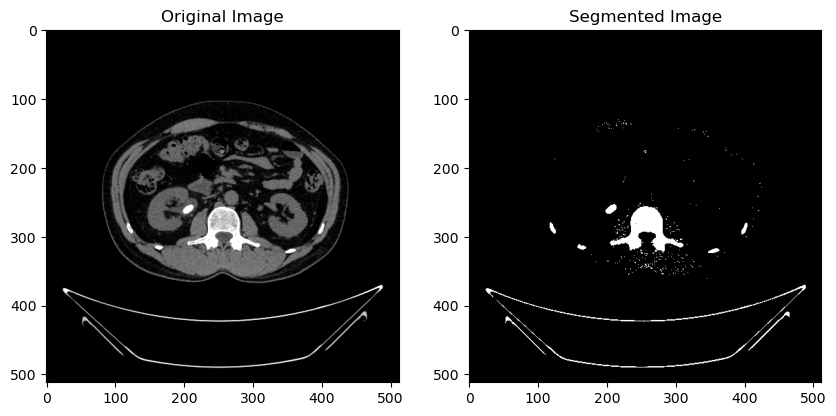

In [35]:
import numpy as np
import mahotas
import cv2
import matplotlib.pyplot as plt


def preprocess_image(image_path):
    """Load and preprocess the CT image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Normalize the image
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return image


def segment_kidney(image):
    """Segment the kidney stone area."""
    # Apply thresholding
    _, segmented = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    return segmented


def extract_features(segmented, original):
    """Extract features from the segmented and original images."""
    # Area (Size)
    area = np.sum(segmented > 0)

    # Intensity Stats (Mean, Std)
    intensities = original[segmented > 0]
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)

    # Texture Features (Haralick)
    haralick_features = mahotas.features.haralick(segmented, ignore_zeros=True)
    mean_haralick = haralick_features.mean(axis=0)

    contrast = mean_haralick[1]  # Contrast
    energy = mean_haralick[2]    # Energy
    homogeneity = mean_haralick[4]  # Homogeneity
    correlation = mean_haralick[8]  # Correlation

    # Print features
    print(f"Extracted Features:")
    print(f" - Area: {area}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Energy: {energy:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")
    print(f" - Correlation: {correlation:.2f}")


def main():
    """Main function to load, process, and extract features."""
    # Step 1: Load and preprocess the image
    image_path = "stone/Stone- (10).jpg"  
    print("Loading image...")
    original_image = preprocess_image(image_path)

    # Step 2: Segment the kidney area
    print("Segmenting image...")
    segmented_image = segment_kidney(original_image)

    # Step 3: Extract features
    print("Extracting features...")
    extract_features(segmented_image, original_image)

    # Step 4: Visualize
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap="gray")
    plt.show()


if __name__ == "__main__":
    main()



In [43]:
# Visualize overlay
overlay = cv2.addWeighted(original_image, 0.7, segmented_image, 0.3, 0)
plt.imshow(overlay, cmap="gray")
plt.title("Segmented Overlay")
plt.show()


NameError: name 'original_image' is not defined

Loading image...
Segmenting image...
Extracting features...
Extracted Features:
 - Area: 6173
 - Mean Intensity: 198.71
 - Standard Deviation: 53.18
 - Contrast: 0.00
 - Energy: 1.00
 - Homogeneity: 1.00
 - Correlation: 0.00


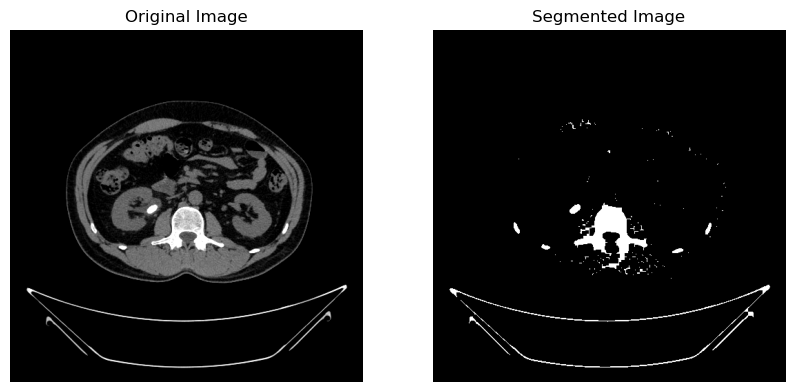

In [45]:
import numpy as np
import mahotas
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Load and preprocess the CT image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Normalize the image (optional but can help with contrast)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return image


def segment_kidney(image):
    """Segment the kidney stone area using thresholding."""
    # Apply thresholding (may need adjustment based on the image)
    _, segmented = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
    # Optional: perform morphological operations to clean the segmented image
    kernel = np.ones((5, 5), np.uint8)
    segmented = cv2.morphologyEx(segmented, cv2.MORPH_CLOSE, kernel)  # Closing
    return segmented


def extract_features(segmented, original):
    """Extract features from the segmented and original images."""
    # Area (Size of the segmented region)
    area = np.sum(segmented > 0)

    # Intensity Stats (Mean, Std of the segmented region)
    intensities = original[segmented > 0]
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)

    # Texture Features (Haralick)
    # Ensure the image is binary for Haralick features extraction
    haralick_features = mahotas.features.haralick(segmented, ignore_zeros=True)
    mean_haralick = haralick_features.mean(axis=0)

    contrast = mean_haralick[1]  # Contrast
    energy = mean_haralick[2]    # Energy
    homogeneity = mean_haralick[4]  # Homogeneity
    correlation = mean_haralick[8]  # Correlation

    # Print extracted features
    print(f"Extracted Features:")
    print(f" - Area: {area}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Energy: {energy:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")
    print(f" - Correlation: {correlation:.2f}")


def main():
    """Main function to load, process, and extract features."""
    # Step 1: Load and preprocess the image
    image_path = "stone/Stone- (10).jpg"  # Provide your image path here
    print("Loading image...")
    original_image = preprocess_image(image_path)

    # Step 2: Segment the kidney stone area
    print("Segmenting image...")
    segmented_image = segment_kidney(original_image)

    # Step 3: Extract features
    print("Extracting features...")
    extract_features(segmented_image, original_image)

    # Step 4: Visualize results
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.axis("off")
    
    # Display the segmented image
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap="gray")
    plt.axis("off")
    
    # Show the plots
    plt.show()


if __name__ == "__main__":
    main()


Loading image...
Segmenting image...
Extracting features...
Extracted Features:
 - Area: 6173
 - Mean Intensity: 198.71
 - Standard Deviation: 53.18
 - Contrast: 0.00
 - Energy: 1.00
 - Homogeneity: 1.00
 - Correlation: 0.00


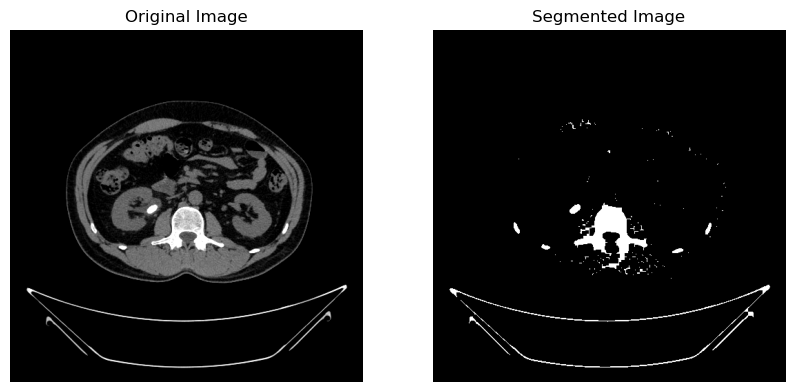

In [53]:
import numpy as np
import mahotas
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Load and preprocess the CT image."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Normalize the image (optional but can help with contrast)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return image


def segment_kidney(image):
    """Segment the kidney stone area using thresholding."""
    # Apply thresholding (may need adjustment based on the image)
    _, segmented = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
    # Optional: perform morphological operations to clean the segmented image
    kernel = np.ones((5, 5), np.uint8)
    segmented = cv2.morphologyEx(segmented, cv2.MORPH_CLOSE, kernel)  # Closing
    return segmented


def extract_features(segmented, original):
    """Extract features from the segmented and original images."""
    # Area (Size of the segmented region)
    area = np.sum(segmented > 0)

    # Intensity Stats (Mean, Std of the segmented region)
    intensities = original[segmented > 0]
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)

    # Texture Features (Haralick)
    # Ensure the image is binary for Haralick features extraction
    haralick_features = mahotas.features.haralick(segmented, ignore_zeros=True)
    mean_haralick = haralick_features.mean(axis=0)

    contrast = mean_haralick[1]  # Contrast
    energy = mean_haralick[2]    # Energy
    homogeneity = mean_haralick[4]  # Homogeneity
    correlation = mean_haralick[8]  # Correlation

    # Print extracted features
    print(f"Extracted Features:")
    print(f" - Area: {area}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Energy: {energy:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")
    print(f" - Correlation: {correlation:.2f}")


def main():
    """Main function to load, process, and extract features."""
    # Step 1: Load and preprocess the image
    image_path = "stone/Stone- (10).jpg"  # Provide your image path here
    print("Loading image...")
    original_image = preprocess_image(image_path)

    # Step 2: Segment the kidney stone area
    print("Segmenting image...")
    segmented_image = segment_kidney(original_image)

    # Step 3: Extract features
    print("Extracting features...")
    extract_features(segmented_image, original_image)

    # Step 4: Visualize results
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.axis("off")
    
    # Display the segmented image
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_image, cmap="gray")
    plt.axis("off")
    
    # Show the plots
    plt.show()


if __name__ == "__main__":
    main()


In [63]:
def extract_shape_features(segmented):
    """Extract shape features (area, perimeter)."""
    contours, _ = cv2.findContours(segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None

    # Area
    area = cv2.contourArea(contours[0])
    
    # Perimeter
    perimeter = cv2.arcLength(contours[0], True)

    return area, perimeter


In [65]:
def extract_intensity_features(segmented, original):
    """Extract intensity features (mean, std)."""
    intensities = original[segmented > 0]
    mean_intensity = np.mean(intensities)
    std_intensity = np.std(intensities)
    
    return mean_intensity, std_intensity


In [67]:
def extract_texture_features(segmented):
    """Extract texture features using Haralick."""
    # Compute Haralick features
    haralick_features = mahotas.features.haralick(segmented, ignore_zeros=True)
    mean_haralick = haralick_features.mean(axis=0)
    
    # Extract individual features
    contrast = mean_haralick[1]  # Contrast
    energy = mean_haralick[2]    # Energy
    homogeneity = mean_haralick[4]  # Homogeneity
    correlation = mean_haralick[8]  # Correlation
    
    return contrast, energy, homogeneity, correlation


## Stone Image feature extract

Loading image...
Segmenting image...
Extracting features...
Extracted Features:
 - Area: 83.5
 - Perimeter: 173.32085502147675
 - Mean Intensity: 198.71
 - Standard Deviation: 53.18
 - Contrast: 0.00
 - Energy: 1.00
 - Homogeneity: 1.00
 - Correlation: 0.00


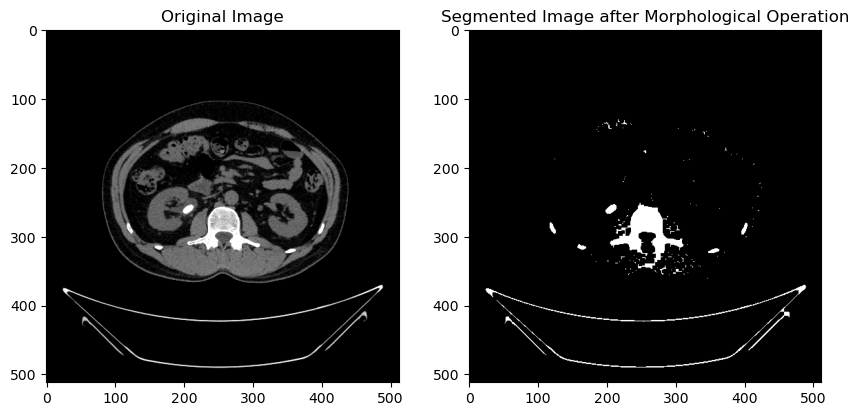

In [69]:
def main():
    """Main function to load, process, and extract features."""
    # Load and preprocess the image
    image_path = "stone/Stone- (10).jpg"  
    print("Loading image...")
    original_image = preprocess_image(image_path)

    # Segment the kidney area
    print("Segmenting image...")
    segmented_image = segment_kidney(original_image)

    # Post-processing: Apply morphological operation to remove noise
    kernel = np.ones((5, 5), np.uint8)  # Create a kernel for morphological operations
    segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)

    # Extract features
    print("Extracting features...")
    area, perimeter = extract_shape_features(segmented_image)
    mean_intensity, std_intensity = extract_intensity_features(segmented_image, original_image)
    contrast, energy, homogeneity, correlation = extract_texture_features(segmented_image)

    # Print extracted features
    print("Extracted Features:")
    print(f" - Area: {area}")
    print(f" - Perimeter: {perimeter}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Energy: {energy:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")
    print(f" - Correlation: {correlation:.2f}")

    # Visualize the original and segmented image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image after Morphological Operation")
    plt.imshow(segmented_image, cmap="gray")
    plt.show()

if __name__ == "__main__":
    main()


## Normal Image feature 

Loading image...
Segmenting image...
Extracting features...
Extracted Features:
 - Area: 129.5
 - Perimeter: 139.72287034988403
 - Mean Intensity: 141.80
 - Standard Deviation: 26.52
 - Contrast: 0.00
 - Energy: 1.00
 - Homogeneity: 1.00
 - Correlation: 0.00


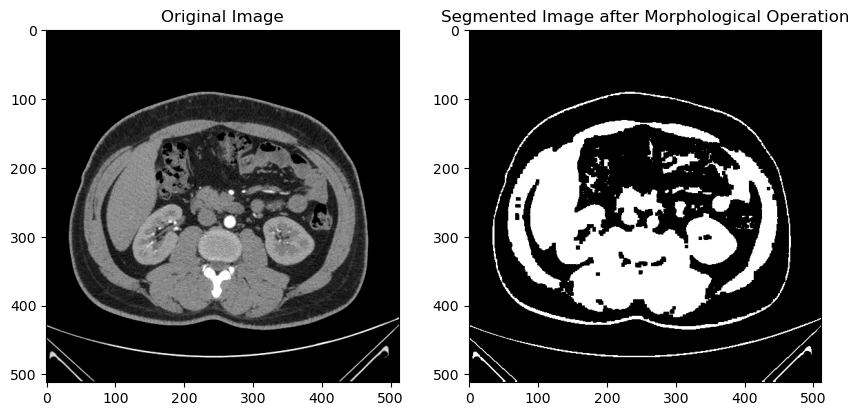

In [77]:
def main():
    """Main function to load, process, and extract features."""
    # Load and preprocess the image
    image_path = "Normal- (75).jpg"  
    print("Loading image...")
    original_image = preprocess_image(image_path)

    # Segment the kidney area
    print("Segmenting image...")
    segmented_image = segment_kidney(original_image)

    # Post-processing: Apply morphological operation to remove noise
    kernel = np.ones((5, 5), np.uint8)  # Create a kernel for morphological operations
    segmented_image = cv2.morphologyEx(segmented_image, cv2.MORPH_CLOSE, kernel)

    # Extract features
    print("Extracting features...")
    area, perimeter = extract_shape_features(segmented_image)
    mean_intensity, std_intensity = extract_intensity_features(segmented_image, original_image)
    contrast, energy, homogeneity, correlation = extract_texture_features(segmented_image)

    # Print extracted features
    print("Extracted Features:")
    print(f" - Area: {area}")
    print(f" - Perimeter: {perimeter}")
    print(f" - Mean Intensity: {mean_intensity:.2f}")
    print(f" - Standard Deviation: {std_intensity:.2f}")
    print(f" - Contrast: {contrast:.2f}")
    print(f" - Energy: {energy:.2f}")
    print(f" - Homogeneity: {homogeneity:.2f}")
    print(f" - Correlation: {correlation:.2f}")

    # Visualize the original and segmented image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image after Morphological Operation")
    plt.imshow(segmented_image, cmap="gray")
    plt.show()

if __name__ == "__main__":
    main()
